# Credit Risk Scoring

## Data cleaning and preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./CreditScoring.csv")

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df['status'].value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [6]:
df['status'] = df['status'].map({1:'ok',2:'default',0:'unknown'})

In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)
 
marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)
 
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)
 
job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)
 

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


### Above we see max values are very huge and we need to clean it

In [10]:
for col in ['income','assets','debt']:
    df[col] = df[col].replace(to_replace=99999999,value=np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df = df[df['status']!='unknown'].reset_index(drop=True)

## Spliting the dataframe to train, validation and testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=11)

df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=11)

In [15]:

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [16]:
y_train = (df_train['status']=='default').astype(int).values
y_val = (df_val['status']=='default').astype(int).values
y_test = (df_test['status']=='default').astype(int).values


In [17]:
del df_train['status']
del df_val['status']
del df_test['status']

In [18]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision tree

In [19]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else: 
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'         

In [20]:
xi = df_train.iloc[0].to_dict()
xi         

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [21]:
assess_risk(xi)

'ok'

### Above we have implemented rules manually, this can be learned by the model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [23]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [24]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [25]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
val_dicts = df_val.fillna(0).to_dict(orient='records')

In [27]:
X_val = dv.transform(val_dicts)

In [28]:
y_pred = dt.predict_proba(X_val)[:,1]

In [29]:
roc_auc_score(y_val,y_pred)

0.6532476810927321

In [30]:
# lets see roc-auc for training dataset

y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

### We see that the ROC AUC for training dataset is 1.0 and for the validation dataset is 0.67, this is overfitting.

#### Overfitting: Model learns too well that it memorizes the data, when it sees new example its clueless and unable to predict.

#### We can restrict the depth of the tree, to address this problem

In [31]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
#
y_pred = dt.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train,y_pred)
print(f"AUC for training dataset is {auc_train}")

y_pred = dt.predict_proba(X_val)[:,1]
auc_val = roc_auc_score(y_val,y_pred)
print(f"AUC for validation dataset is {auc_val}")

AUC for training dataset is 0.7054989859726213
AUC for validation dataset is 0.6685264343319367


In [33]:
# what are the rules of tree
from sklearn.tree import export_text

In [34]:
print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



## Tuning Decision Tree Algorithm

- Selecting `max depth`
- Selecting `min_samples_leaf`

In [35]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print(f"{d}->{auc:.3f}")

1->0.606
2->0.669
3->0.739
4->0.761
5->0.766
6->0.745
10->0.700
15->0.664
20->0.662
None->0.664


#### Best depths are 4,5,6

In [36]:
scores = []
for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,s,auc))

In [37]:
columns = ['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [38]:
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
40,10.0,15,0.789391
49,15.0,15,0.788752
58,20.0,15,0.788047
67,NaN,15,0.786885
41,10.0,20,0.785646
...,...,...,...
53,15.0,500,0.679842
71,NaN,500,0.679842
45,15.0,1,0.663447
63,NaN,1,0.661648


In [39]:
df_scores_pivot = df_scores.pivot_table(index='min_samples_leaf',
                      columns='max_depth',
                      values = 'auc')

df_scores_pivot.round(3)

max_depth,4.0,5.0,6.0,7.0,10.0,15.0,20.0
min_samples_leaf,,,,,,,
1,0.761,0.767,0.756,0.749,0.698,0.663,0.650
2,0.761,0.767,0.758,0.751,0.712,0.690,0.687
5,0.761,0.768,0.762,0.759,0.724,0.714,0.714
10,0.761,0.762,0.778,0.764,0.766,0.759,0.762
15,0.764,0.772,0.785,0.779,0.789,0.789,0.788
20,0.761,0.774,0.774,0.779,0.786,0.782,0.782
100,0.756,0.763,0.776,0.780,0.779,0.779,0.780
200,0.747,0.759,0.768,0.768,0.768,0.768,0.768
500,0.680,0.680,0.680,0.680,0.680,0.680,0.680


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

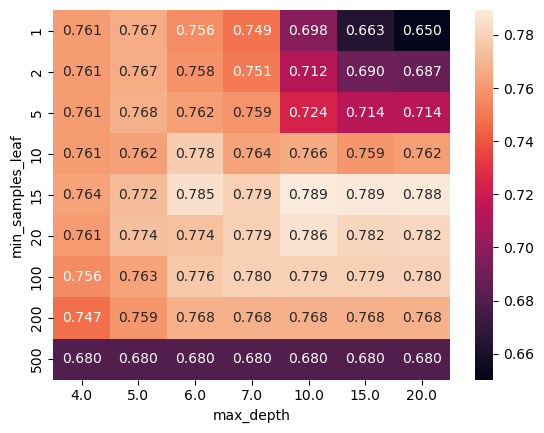

In [40]:
sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

In [41]:
max_depth = 10
min_samples_leaf = 15


In [42]:
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=15)

In [43]:
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Ensembles and random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val,y_pred)

0.7744726453706618

In [47]:
rf_roc_auc_scores=[]
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    rf_auc = roc_auc_score(y_val,y_pred)
    rf_roc_auc_scores.append((n,rf_auc))

df_rf_n_auc = pd.DataFrame(rf_roc_auc_scores,columns=['n_estimators','auc'])

In [48]:
df_rf_n_auc

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


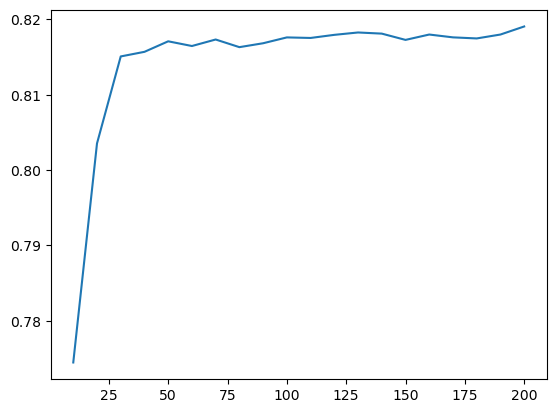

In [49]:
plt.plot(df_rf_n_auc['n_estimators'],df_rf_n_auc['auc'])

In [50]:
rf_d_auc_scores=[]

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=d,random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        rf_auc = roc_auc_score(y_val,y_pred)
        rf_d_auc_scores.append((d,n,rf_auc))

df_d_rf_n_auc = pd.DataFrame(rf_d_auc_scores,columns=['max_depth','n_estimators','auc'])

In [51]:
df_d_rf_n_auc

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878
5,5,60,0.801167
6,5,70,0.802251
7,5,80,0.803244
8,5,90,0.803616
9,5,100,0.804452


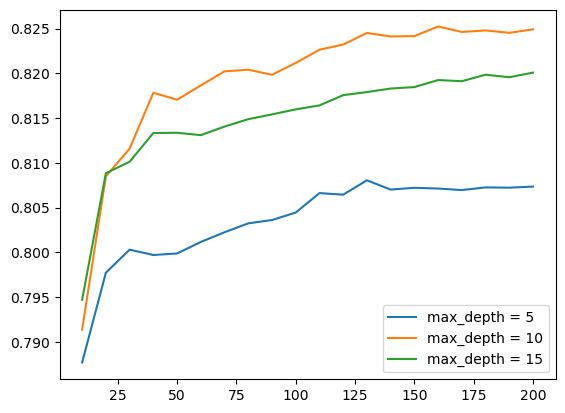

In [52]:
for d in [5,10,15]:
    df_subset = df_d_rf_n_auc[df_d_rf_n_auc['max_depth']==d]
    plt.plot(df_subset['n_estimators'],df_subset['auc'],label=f"max_depth = {d}")
    plt.legend()

In [53]:
max_depth =10
n_estimators = 1

In [54]:
rf_leaf_auc_scores=[]

for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        rf_auc = roc_auc_score(y_val,y_pred)
        rf_leaf_auc_scores.append((s,n,rf_auc))

df_leaf_rf_n_auc = pd.DataFrame(rf_leaf_auc_scores,
                                columns=['min_samples_leaf','n_estimators','auc'])

In [55]:
df_leaf_rf_n_auc

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058
...,...,...,...
95,50,160,0.805929
96,50,170,0.805172
97,50,180,0.805324
98,50,190,0.805596


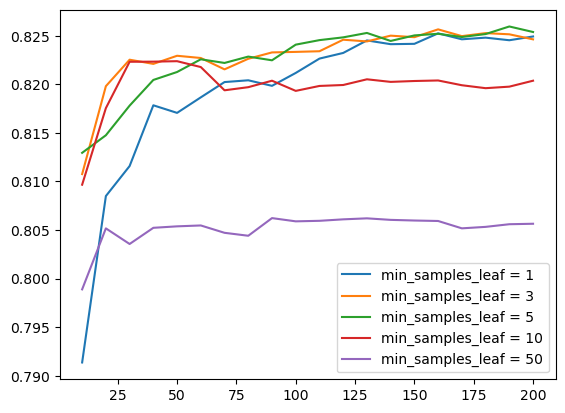

In [56]:
for s in [1,3,5,10,50]:
    df_subset = df_leaf_rf_n_auc[df_leaf_rf_n_auc['min_samples_leaf']==s]
    plt.plot(df_subset['n_estimators'],df_subset['auc'],label=f"min_samples_leaf = {s}")
    plt.legend()

In [57]:
#our best value for mean_samples_leaf
min_samples_leaf = 3

In [58]:
rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                           n_jobs=-1)
rf.fit(X_train,y_train)

,n_estimators,1
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Gradient boosting and XGBoost

In [59]:
import xgboost as xgb

In [60]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train,label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [61]:
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'nthread':8,

    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,num_boost_round=200)

In [62]:
y_pred = model.predict(dval)

In [63]:
roc_auc_score(y_val,y_pred)

0.8060200770143614

In [64]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [65]:
%%capture output
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,

    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [66]:
def parse_xgb_output(output):
    results = []
    tree = []
    aucs_train =[]
    aucs_val = []
    
    for line in output.stdout.strip().split('\n'):
        it, train_auc,val_auc = line.split('\t')

        it = int(it.strip('[]'))
        train_auc = float(train_auc.split(':')[1])
        val_auc = float(val_auc.split(':')[1])
        results.append((it,train_auc,val_auc))

    df_results = pd.DataFrame(results,columns=['num_iter','train_auc','val_auc'])  
    return df_results

In [67]:
df_xgb_results = parse_xgb_output(output)
df_xgb_results

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.92969,0.80822
2,10,0.95512,0.81115
3,15,0.96767,0.81993
4,20,0.97648,0.81877
5,25,0.98248,0.81520
6,30,0.98844,0.81613
7,35,0.99244,0.81453
8,40,0.99393,0.81407
9,45,0.99568,0.81392


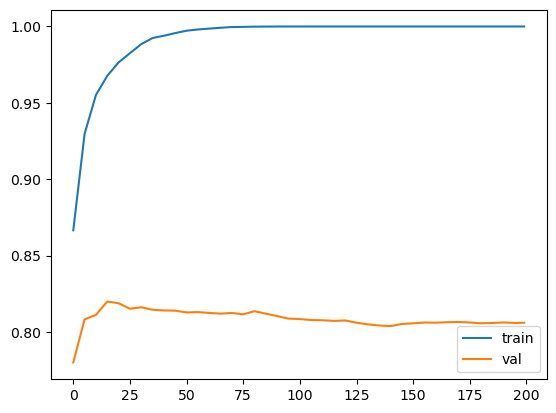

In [68]:
plt.plot(df_xgb_results['num_iter'],df_xgb_results['train_auc'],label='train')
plt.plot(df_xgb_results['num_iter'],df_xgb_results['val_auc'],label='val')
plt.legend()

## XGBoost Parameter tuning

Tuning the following parameters:

- eta - Learning rate - how much size of step is required for correction
- max_depth
- min_child_weight

In [69]:
xgb_eta_auc_scores = {}

In [70]:
%%capture output
xgb_params = {
    'eta':1.0,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [71]:
key = f"eta={xgb_params['eta']}"
xgb_eta_auc_scores[key]=parse_xgb_output(output)
        

In [72]:
xgb_eta_auc_scores.keys()

dict_keys(['eta=1.0'])

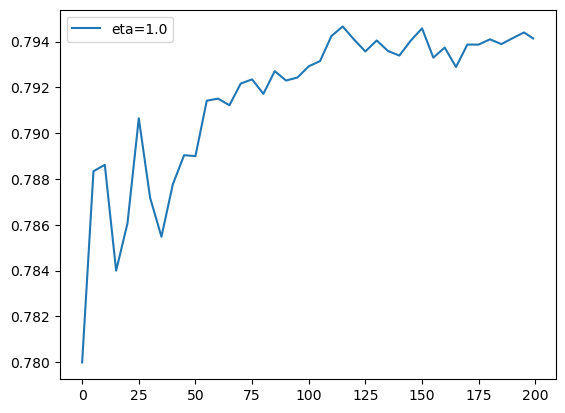

In [73]:
for key, df_scores in xgb_eta_auc_scores.items():
    plt.plot(df_scores['num_iter'],df_scores['val_auc'],label=key)
plt.legend()    

## 📈 XGBoost Learning Rate (η) Comparison

Each line in the plot represents a different **learning rate (η)**:

| Color | η (Learning Rate) |
|--------|-------------------|
| 🟦 Blue | 0.01 |
| 🟧 Orange | 0.05 |
| 🟩 Green | 0.1 |
| 🟥 Red | 0.3 |
| 🟪 Purple | 1.0 |

---

### 🔍 What the Plot Shows
- **X-axis:** Boosting rounds (`num_iter`)
- **Y-axis:** Validation AUC (`val_auc`)

Each curve represents how the validation AUC evolves during training for a specific η value.

---

### 📊 Interpretation

| η Value | Behavior | Notes |
|----------|-----------|-------|
| **0.01** | Slowly increasing AUC that continues improving even after 150 rounds | Underfits early but shows strong potential if trained longer. |
| **0.05** | Reaches the **highest and most stable AUC (~0.83)** early and remains consistent | ✅ **Best overall generalization performance.** |
| **0.1** | Fast rise in AUC (~0.829) followed by a slight decline after 100 rounds | Slight **overfitting** starts to appear. |
| **0.3** | Rapid initial improvement, then plateau around 0.81 | Learning rate is **too high**, leading to early overfitting. |
| **1.0** | Flat and poor AUC (~0.79) | **Model fails to converge** — steps are too large. |

---

### 🏆 **Best η:** `0.05`

#### ✅ Why It’s Best
1. Achieves **highest and most stable AUC** across all iterations.  
2. Converges **faster** than smaller η values (like 0.01).  
3. Avoids **overfitting** seen in higher η values.  
4. Maintains **smooth, stable learning** curve.

---

### ⚖️ Summary Table

| η | Training Speed | Overfitting Risk | Stability | Overall Verdict |
|---|----------------|------------------|------------|----------------|
| **0.01** | Slow | Low | Very High | Good (if you can train longer) |
| **0.05** | Moderate | Low | High | ✅ **Best choice** |
| **0.1** | Fast | Medium | Moderate | Acceptable |
| **0.3** | Fast | High | Low | Overfitting |
| **1.0** | Too fast | Very High | Very Low | Poor |


In [74]:
xgb_max_depth_aucs = {}

In [75]:
%%capture output
xgb_params = {
    'eta':0.05,
    'max_depth':10,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [76]:
key = f"max_depth={xgb_params['max_depth']}"
xgb_max_depth_aucs[key]=parse_xgb_output(output)

In [77]:
xgb_max_depth_aucs.keys()

dict_keys(['max_depth=10'])

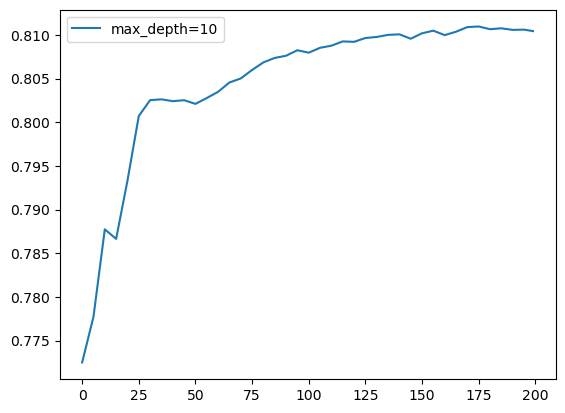

In [78]:
for max_depth, df_scores in xgb_max_depth_aucs.items():
    plt.plot(df_scores['num_iter'],df_scores['val_auc'],label=max_depth)
plt.legend()    

## 🌲 XGBoost `max_depth` Parameter Comparison

Each line in the plot represents a model trained with a different **tree depth** (`max_depth`) in XGBoost:

| Color | max_depth |
|--------|------------|
| 🟦 Blue | 6 |
| 🟧 Orange | 3 |
| 🟩 Green | 4 |
| 🟥 Red | 10 |

---

### 🔍 What the Plot Shows
- **X-axis:** Boosting rounds (`num_iter`)  
- **Y-axis:** Validation AUC (`val_auc`)  
- Each curve represents how AUC changes as boosting progresses for a given `max_depth`.

---

### 📊 Interpretation

| Depth | Behavior | Notes |
|--------|-----------|-------|
| **3 (Orange)** | Smooth, steady learning; reaches high AUC (~0.828–0.83) and remains stable. | ✅ **Best generalization** — avoids overfitting while maintaining strong performance. |
| **4 (Green)** | Slightly higher early AUC, but stabilizes around the same as depth=3. | Good choice, but not significantly better than 3. |
| **6 (Blue)** | Fast initial gain; plateaus around 0.828–0.829. | Acceptable, but more prone to overfitting. |
| **10 (Red)** | Underperforms; AUC stagnates early (~0.80). | ❌ Too deep — overfits and generalizes poorly. |

---

### 🏆 **Best Parameter: `max_depth = 3`**

#### ✅ Why It’s Best
1. Achieves **highest and most stable validation AUC** (~0.83).  
2. **Smooth learning curve** — no early overfitting or instability.  
3. **Simpler model** — faster training and better generalization.  
4. **Deeper trees (≥6)** add complexity without performance gain.

---

### ⚖️ Summary Table

| max_depth | AUC Trend | Overfitting Risk | Stability | Verdict |
|------------|------------|------------------|------------|----------|
| **3** | High, smooth | Low | Very High | ✅ **Best choice** |
| **4** | Slightly higher early, same final | Low-Medium | High | Good |
| **6** | Peaks fast, minor gain | Medium | Moderate | Acceptable |
| **10** | Flattens early | High | Low | Poor |

---

### 💡 Recommended Parameter Setup

```python
xgb_params = {
    'max_depth': 3,
    'eta': 0.05,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    # add other params as needed
}


In [79]:
xgb_child_auc = {}

In [80]:
%%capture output
xgb_params = {
    'eta':0.05,
    'max_depth':3,
    'min_child_weight':30,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [81]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
xgb_child_auc[key]=parse_xgb_output(output)

In [82]:
xgb_child_auc.keys()

dict_keys(['min_child_weight=30'])

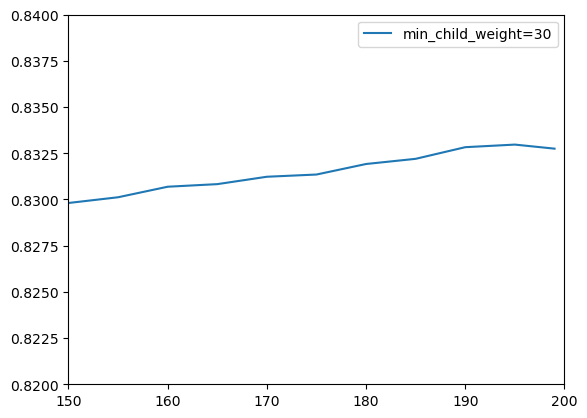

In [83]:
for min_child_weight, df_scores in xgb_child_auc.items():
    plt.plot(df_scores['num_iter'],df_scores['val_auc'],label=min_child_weight)
plt.ylim(0.82,0.84)
plt.xlim(150,200)
plt.legend()    


## ⚖️ XGBoost `min_child_weight` Parameter Comparison

Each line in the plot represents a model trained with a different **`min_child_weight`** value:

| Color | min_child_weight |
|--------|------------------|
| 🟦 Blue | 1 |
| 🟧 Orange | 10 |
| 🟩 Green | 30 |

---

### 🔍 What the Plot Shows
- **X-axis:** Boosting rounds (`num_iter`)  
- **Y-axis:** Validation AUC (`val_auc`)  
- Each curve represents the AUC trend during training for a specific `min_child_weight`.

---

### 📊 Interpretation

| min_child_weight | Behavior | Notes |
|------------------|-----------|-------|
| **1 (Blue)** | Learns slightly faster early on, stabilizes near ~0.833. | More flexible, but with higher risk of overfitting. |
| **10 (Orange)** | Balanced learning curve, final AUC around ~0.834. | Strong generalization, stable performance. |
| **30 (Green)** | Slightly slower to start, ends with ~0.835 AUC. | ✅ Most stable and regularized; excellent generalization. |

---

### 🏆 **Best Parameter: `min_child_weight = 30`**

#### ✅ Why It’s Best
1. **Highest or equal final AUC** among all tested values (~0.835).  
2. **Smooth, stable learning curve** — no oscillations or noise.  
3. **Better regularization** — prevents overfitting while maintaining strong accuracy.  
4. Ideal for **large or noisy datasets** where simpler, more generalizable trees perform better.

---

### ⚖️ Summary Table

| min_child_weight | Model Flexibility | Overfitting Risk | Stability | AUC | Verdict |
|------------------|------------------|------------------|------------|------|----------|
| **1** | High | Medium | Moderate | ~0.833 | Acceptable |
| **10** | Moderate | Low | High | ~0.834 | Good |
| **30** | Low | Very Low | Very High | ~0.835 | ✅ **Best choice** |

---

### 💡 Recommended Parameter Setup

```python
xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 30,  # ✅ Best stability & generalization
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}


In [84]:
#our final model
xgb_params = {
    'eta':0.05,
    'max_depth':3,
    'min_child_weight':30,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,num_boost_round=190)

## Selecting the final model



In [85]:
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=15)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [86]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7900874282531302

In [87]:
min_samples_leaf = 3
max_depth = 10
n_estimators = 160
rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                           n_jobs=-1)
rf.fit(X_train,y_train)

,n_estimators,160
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.8256551064396599

In [89]:
#our final model
xgb_params = {
    'eta':0.05,
    'max_depth':3,
    'min_child_weight':30,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,num_boost_round=190)

In [90]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8326481557724443

## Final model

In [91]:
df_full_train = df_full_train.reset_index(drop=True)

In [92]:
y_full_train = (df_full_train['status']=='default').astype(int).values

In [93]:
del df_full_train['status']

In [94]:
dicts_full_train  = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test  = dv.transform(dicts_test)

In [95]:
features=list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train,label=y_full_train,
                   feature_names=features)

dtest = xgb.DMatrix(X_test,feature_names=features)

In [96]:
#our final model
xgb_params = {
    'eta':0.05,
    'max_depth':3,
    'min_child_weight':30,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1
}
model = xgb.train(xgb_params,dtrain,num_boost_round=190)

In [97]:
y_pred=model.predict(dtest)
roc_auc_score(y_test,y_pred)

0.8212025316455697

Our final model have auc 82.12%